# Chapter 003 Examples 002
## Predict my mother's Roses

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

In [2]:
imagepath = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 03'])
print(imagepath)

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Results\Chapter 03


In [3]:
if not os.path.exists(imagepath):
    os.makedirs(imagepath)

In [4]:
xfile=os.path.abspath("../../Data/x-roses.csv")
print(xfile)

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Data\x-roses.csv


In [5]:
# Import data about my roses
X = np.loadtxt(xfile, delimiter=",")

In [6]:
yfile=os.path.abspath("../../Data/y-roses.csv")
print(yfile)

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Data\y-roses.csv


In [7]:
y = np.loadtxt(yfile, delimiter=",")

In [8]:
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

In [9]:
# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

In [10]:
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=12)

In [11]:
# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(gamma='auto'))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [12]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

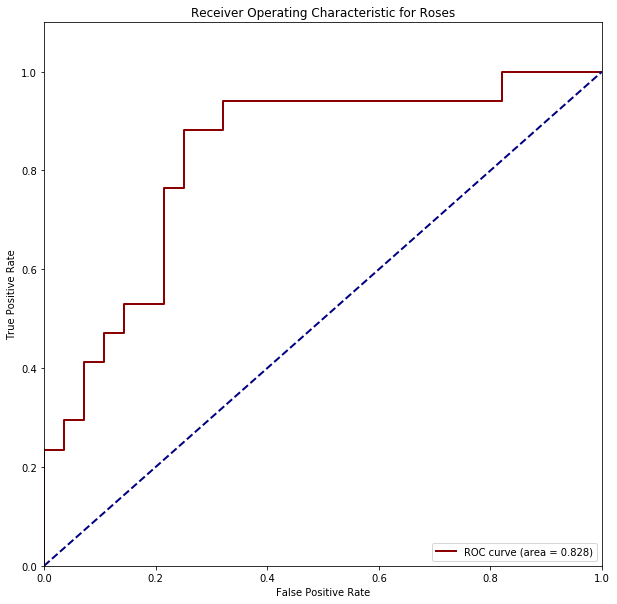

In [13]:
# Compute Micro-Average ROC curve and ROC area

fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
fig1 = plt.figure(figsize=(10, 10))
lw = 2
plt.plot(fpr[2], tpr[2], color='darkred',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Roses')
plt.legend(loc="lower right")
plt.show()

In [14]:
imagename = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 03','Chapter-003-Examples-002-01.jpg'])
fig1.savefig(imagename, bbox_inches='tight')

In [15]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

In [16]:
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

In [17]:
# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

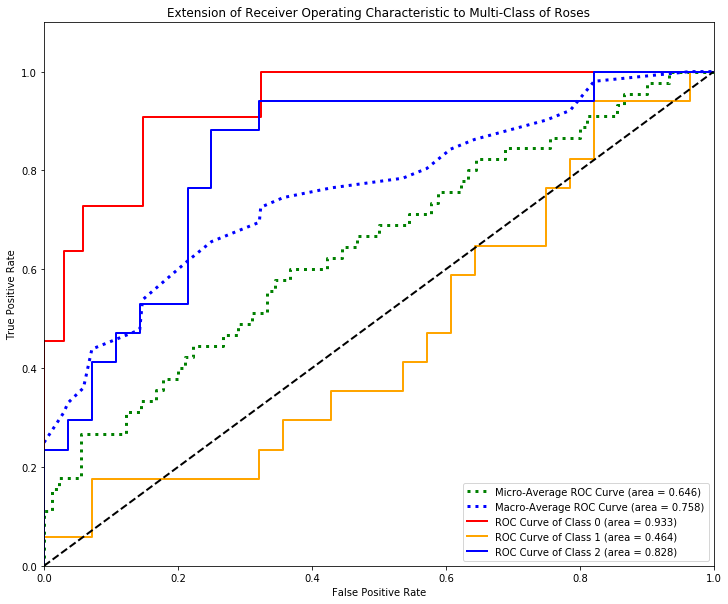

In [18]:
# Plot every ROC curve
fig2 = plt.figure(figsize=(12, 10))
plt.plot(fpr["micro"], tpr["micro"],
         label='Micro-Average ROC Curve (area = {0:0.3f})'
               ''.format(roc_auc["micro"]),
         color='green', linestyle=':', linewidth=3)

plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-Average ROC Curve (area = {0:0.3f})'
               ''.format(roc_auc["macro"]),
         color='blue', linestyle=':', linewidth=3)

colors = cycle(['red', 'orange', 'blue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC Curve of Class {0} (area = {1:0.3f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Extension of Receiver Operating Characteristic to Multi-Class of Roses')
plt.legend(loc="lower right")
plt.show()

In [19]:
imagename = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 03','Chapter-003-Examples-002-02.jpg'])
fig2.savefig(imagename, bbox_inches='tight')

In [20]:
print('Done!')

Done!
